In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# **IMPORT LIBRARY YANG KUBUTUHKAN**

In [ ]:
!pip install nltk
!pip install emoji
!pip install sastrawi

import random
import numpy as np

# Set random seed for reproducibility
random.seed(42)
np.random.seed(42)

# Add other imports and your code below
import nltk
import emoji
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_absolute_error
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('vader_lexicon')
nltk.download('punkt_tab')


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

# **MEMASUKKAN DATASET **

In [ ]:
import pandas as pd

file_path = r'/content/drive/MyDrive/JOKI CODING/IVAN/DATASET CYBERBULLYING INSTAGRAM - FINAL.csv'

df_test = pd.read_csv(file_path)
df_test


,Komentar,Kategori,Unnamed: 2,Unnamed: 3
0,"""Kaka tidur yaa, udah pagi, gaboleh capek2""",Non-bullying,NaN,NaN
1,"""makan nasi padang aja begini badannya""",Non-bullying,NaN,NaN
2,"""yang aku suka dari dia adalah selalu cukur je...",Bullying,NaN,NaN
3,"""Hai kak Isyana aku ngefans banget sama kak Is...",Non-bullying,NaN,NaN
4,"""Manusia apa bidadari sih herann deh cantik te...",Non-bullying,NaN,NaN
...,...,...,...,...
645,"""aku memutuskan untuk menjadi fans isyana. gil...",Non-bullying,NaN,NaN
646,"""AMZING ISYANAA!! Jujur aku amazed banget deng...",Non-bullying,NaN,NaN
647,"""paling ngiri liat orang keren maen alat musik...",Non-bullying,NaN,NaN
648,"""Sampe ga bisa berkata2 lagi buat isyana, sang...",Non-bullying,NaN,NaN


# **DATA CLEANING MENGHAPUS KOLOM**

In [ ]:
# Menghapus kolom 'Unnamed: 2' dan 'Unnamed: 3' jika ada
df_test = df_test.drop(columns=['Unnamed: 2', 'Unnamed: 3'], errors='ignore')
df_test


,Komentar,Kategori
0,"""Kaka tidur yaa, udah pagi, gaboleh capek2""",Non-bullying
1,"""makan nasi padang aja begini badannya""",Non-bullying
2,"""yang aku suka dari dia adalah selalu cukur je...",Bullying
3,"""Hai kak Isyana aku ngefans banget sama kak Is...",Non-bullying
4,"""Manusia apa bidadari sih herann deh cantik te...",Non-bullying
...,...,...
645,"""aku memutuskan untuk menjadi fans isyana. gil...",Non-bullying
646,"""AMZING ISYANAA!! Jujur aku amazed banget deng...",Non-bullying
647,"""paling ngiri liat orang keren maen alat musik...",Non-bullying
648,"""Sampe ga bisa berkata2 lagi buat isyana, sang...",Non-bullying


# **PREPROCESSING**

In [ ]:
def bersihkan_komentar(data_komentar):
    stop_words = set(stopwords.words('indonesian'))
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()

    data_bersih = []
    for komentar in data_komentar:

        # Hapus emoji, URL, dan tag
        komentar = re.sub(r'http\S+', '', komentar)
        komentar = re.sub(r'@\S+', '', komentar)
        komentar = emoji.demojize(komentar)
        komentar = komentar.replace(":", " ")

        # Case folding (Mengubah semua huruf Besar dalam teks menjadi huruf kecil.)
        komentar = komentar.lower()

        # Tokenisasi (Membagi teks menjadi daftar kata-kata individu.Contoh: "Halo semua, selamat pagi!" akan diubah menjadi ["Halo", "semua", ",", "selamat", "pagi", "!"].)
        words = word_tokenize(komentar)

        # Hapus stop words (menghapus kata-kata umum yang tidak membawa banyak informasi (misalnya, "dan", "atau", "yang", "pada", "di"))
        words = [w for w in words if not w in stop_words]

        # Stemming (Mengubah kata menjadi bentuk dasarnya contoh "menjalankan" diubah menjadi "jalan")
        words = [stemmer.stem(w) for w in words]

        # Gabungkan kembali kata-kata
        komentar_bersih = ' '.join(words)

        data_bersih.append(komentar_bersih)
    return data_bersih
# Terapkan ke kolom 'Komentar' di df_test
df_test['Komentar_Bersih'] = bersihkan_komentar(df_test['Komentar'])

# Tampilkan hasil
print(df_test[['Komentar','Kategori', 'Komentar_Bersih']].head())


                                            Komentar      Kategori  \
0        "Kaka tidur yaa, udah pagi, gaboleh capek2"  Non-bullying   
1            "makan nasi padang aja begini badannya"  Non-bullying   
2  "yang aku suka dari dia adalah selalu cukur je...      Bullying   
3  "Hai kak Isyana aku ngefans banget sama kak Is...  Non-bullying   
4  "Manusia apa bidadari sih herann deh cantik te...  Non-bullying   

                                     Komentar_Bersih  
0         kaka tidur yaa  udah pagi  gaboleh capek2   
1                       makan nasi padang aja badan   
2                        suka cukur jembut manggung   
3   hai kak isyana ngefans banget kak isyana aku ...  
4   manusia bidadari sih herann deh cantik reliev...  


In [ ]:
df_test

,Komentar,Kategori,Komentar_Bersih
0,"""Kaka tidur yaa, udah pagi, gaboleh capek2""",Non-bullying,kaka tidur yaa udah pagi gaboleh capek2
1,"""makan nasi padang aja begini badannya""",Non-bullying,makan nasi padang aja badan
2,"""yang aku suka dari dia adalah selalu cukur je...",Bullying,suka cukur jembut manggung
3,"""Hai kak Isyana aku ngefans banget sama kak Is...",Non-bullying,hai kak isyana ngefans banget kak isyana aku ...
4,"""Manusia apa bidadari sih herann deh cantik te...",Non-bullying,manusia bidadari sih herann deh cantik reliev...
...,...,...,...
645,"""aku memutuskan untuk menjadi fans isyana. gil...",Non-bullying,putus fans isyana gila keren banget ya otak...
646,"""AMZING ISYANAA!! Jujur aku amazed banget deng...",Non-bullying,amzing isyanaa jujur amazed banget skill mi...
647,"""paling ngiri liat orang keren maen alat musik...",Non-bullying,ngiri liat orang keren maen alat musik dalem ...
648,"""Sampe ga bisa berkata2 lagi buat isyana, sang...",Non-bullying,sampe ga berkata2 isyana sangat2 sempurna org


# LIHAT DISTRIBUSI KELAS

Distribusi Kelas:
Kategori
Non-bullying    325
Bullying        325
Name: count, dtype: int64


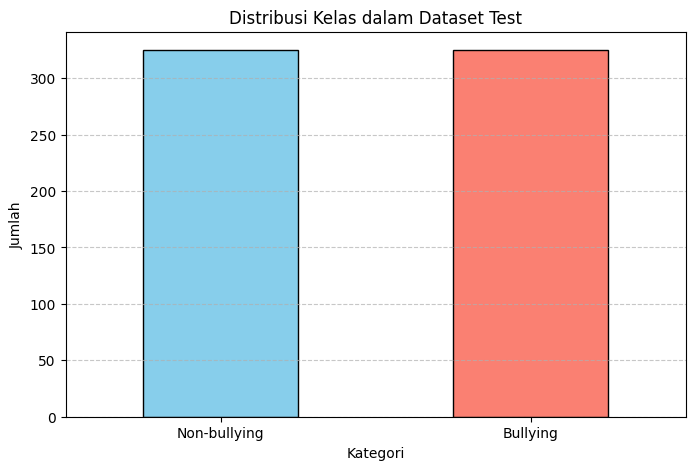

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Cek distribusi kelas pada kolom kategori
class_distribution = df_test['Kategori'].value_counts()

# Menampilkan distribusi dalam bentuk tabel
print("Distribusi Kelas:")
print(class_distribution)

# Plot distribusi kelas
plt.figure(figsize=(8, 5))
class_distribution.plot(kind='bar', color=['skyblue', 'salmon'], edgecolor='black')
plt.title("Distribusi Kelas dalam Dataset Test")
plt.xlabel("Kategori")
plt.ylabel("Jumlah")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# ***TF-IDF SAMA LABELLING ***

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

tfidf = TfidfVectorizer()
# Membagi data menjadi fitur (X) dan label (y)
X = df_test['Komentar_Bersih']  # Fitur teks
y = df_test['Kategori']  # Label kategori

# Split data menjadi training (80%) dan testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#VALIDATION DI CROSSVALIDATION

# Inisialisasi TF-IDF Vectorizer
# tfidf = TfidfVectorizer(max_features=5000)  # max_features untuk membatasi jumlah kata
X_train_tfidf = tfidf.fit_transform(X_train)  # Matriks fitur untuk training
X_test_tfidf = tfidf.transform(X_test)  # Matriks fitur untuk testing

# Inisialisasi LabelEncoder untuk mengubah label menjadi angka
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)  # Mengubah label training menjadi angka
y_test = label_encoder.transform(y_test)  # Mengubah label testing menjadi angka

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Menampilkan label yang telah di-encode
print("Label asli dan label numerik:")
for original, encoded in zip(y_train[:5], y_train[:5]):  # Menampilkan 5 label pertama setelah encoding
    print(f"Original: {label_encoder.inverse_transform([encoded])[0]}, Encoded: {encoded}")

# Menampilkan kelas yang terurut setelah encoding
print("\nLabel setelah encoding:")
print(label_encoder.classes_)


Label asli dan label numerik:
Original: bullying, Encoded: 0
Original: bullying, Encoded: 0
Original: non-bullying, Encoded: 1
Original: bullying, Encoded: 0
Original: bullying, Encoded: 0

Label setelah encoding:
['bullying' 'non-bullying']


In [ ]:
# Menampilkan bentuk (shape) dari hasil TF-IDF
print("Shape of X_train_tfidf:", X_train_tfidf.shape)  # Ukuran matriks fitur untuk training
print("Shape of X_test_tfidf:", X_test_tfidf.shape)  # Ukuran matriks fitur untuk testing
print(X_train_tfidf.toarray()[:5, :10])  # 5 baris pertama, 10 kolom pertama

# Jika ingin melihat beberapa nilai pertama dari matriks fitur (misalnya untuk X_train)
print("TF-IDF matrix for X_train (first 5 rows):")
print(X_train_tfidf.toarray()[:10])  # Menampilkan 5 baris pertama dari matriks TF-IDF

Shape of X_train_tfidf: (520, 1518)
Shape of X_test_tfidf: (130, 1518)
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
TF-IDF matrix for X_train (first 5 rows):
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
print("Vocab size:", len(tfidf.get_feature_names_out()))
print("Example features:", tfidf.get_feature_names_out()[:100])  # Menampilkan beberapa fitur kata


Vocab size: 1518
Example features: ['150' '1988' '20' '20an' '35' '62' 'aa' 'aaa' 'aamiin' 'abai' 'abal'
 'abis' 'abu' 'activity' 'ad' 'adam' 'adaptasi' 'adek' 'adeknya' 'adi'
 'adik' 'aduuh' 'aesthetic' 'agama' 'age' 'ager2' 'ah' 'ahahah' 'ahhaha'
 'aih' 'aing' 'air' 'aj' 'aja' 'ajar' 'aje' 'ajg' 'ajh' 'aji' 'ak' 'aka'
 'akhlak' 'aki' 'aktif' 'aktor' 'aku' 'akun' 'alam' 'alas' 'alat' 'alay'
 'alisny' 'allah' 'alus' 'ama' 'amatt' 'ambil' 'amen' 'amin' 'ampe'
 'amplas' 'ampun' 'an' 'anak' 'anakny' 'ancur' 'and' 'andy' 'anggun'
 'angkut' 'anjay' 'anjeng' 'anjg' 'anjim' 'anjing' 'anjir' 'antem'
 'anteng' 'aowkwkw' 'apa' 'apaa' 'apalo' 'apartment' 'apasih' 'aq'
 'ariana' 'aroma' 'artis' 'asa' 'asik' 'asing' 'asli' 'astaga' 'astagah'
 'astral' 'asu' 'asuh' 'at' 'atas' 'atik']


# **INI NILAI KOORDINAT TIAP KATA **

In [ ]:
print(X_train_tfidf)

  (0, 617)	0.3864555516479527
  (0, 93)	0.44917005133308163
  (0, 1321)	0.3462251473356348
  (0, 154)	0.44917005133308163
  (0, 264)	0.35428667616663934
  (0, 1035)	0.44917005133308163
  (1, 919)	0.2956282726337824
  (1, 815)	0.2850523859454128
  (1, 1268)	0.5661013841848964
  (1, 1043)	0.5661013841848964
  (1, 312)	0.4363570869531994
  (2, 1266)	0.42650804655973007
  (2, 701)	0.34509012476914314
  (2, 1189)	0.42650804655973007
  (2, 874)	0.33641182827196203
  (2, 470)	0.2955581217394275
  (2, 1004)	0.3669576854608775
  (2, 979)	0.42650804655973007
  (3, 74)	0.5487445354745548
  (3, 1497)	0.6530607772340713
  (3, 855)	0.26826787899907334
  (3, 91)	0.28159579226372494
  (3, 78)	0.3480333473992823
  (4, 891)	0.49274305933149076
  (4, 545)	0.5616976501535984
  :	:
  (515, 251)	0.5647948975990025
  (515, 746)	0.5647948975990025
  (516, 919)	0.29262655597458626
  (516, 1126)	0.41479201788025083
  (516, 672)	0.33812051922517083
  (516, 983)	0.5603533684739402
  (516, 223)	0.5603533684739402


# INI UNTUK NGELIHAT HASIL KOORDINAT DIATAS MISAL (0, 93) DAPAT KATA APA...

In [ ]:
# Mendapatkan fitur nama (kata-kata dalam vocabulary)
feature_names = tfidf.get_feature_names_out()

# Contoh koordinat dari X_train_tfidf
row, col = 517, 2

# Mendapatkan kata berdasarkan indeks kolom (col)
word_at_col = feature_names[col]
print(f"Kata pada koordinat ({row}, {col}): {word_at_col}")


Kata pada koordinat (517, 2): 20


# **MENJELASKAN BAGAIMANA TF IDF BEKERJA PER KATANYA**

In [ ]:
import pandas as pd
import numpy as np

# Mengambil seluruh matriks TF-IDF dalam bentuk array
X_train_array = X_train_tfidf.toarray()

# Mengambil nama fitur (kata-kata)
feature_names = tfidf.get_feature_names_out()

# Membuat DataFrame untuk mempermudah penampilan
tfidf_df = pd.DataFrame(X_train_array, columns=feature_names)

# Menampilkan beberapa baris pertama (misalnya 5 dokumen pertama) dan kolom yang ada
print(tfidf_df.head())

# Menampilkan kata-kata yang memiliki nilai TF-IDF tidak nol di beberapa dokumen
for word in feature_names:
    # Ambil nilai TF-IDF untuk kata di seluruh dokumen
    word_tfidf_values = tfidf_df[word].values

    # Jika kata memiliki nilai non-zero di lebih dari 1 dokumen, tampilkan
    if np.sum(word_tfidf_values > 0) > 1:  # Sesuaikan dengan keinginanmu, misalnya lebih dari 1 dokumen
        print(f"\nKata: {word}")
        print("Nilai TF-IDF di dokumen-dokumen terkait:")
        print(word_tfidf_values)


Output streaming akan dipotong hingga 5000 baris terakhir.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

# **NAIVE BAYES**

Hasil Cross-Validation (Accuracy):
   alpha  mean_accuracy  std_accuracy
0    0.1       0.825000      0.038172
1    0.2       0.828846      0.028132
2    0.3       0.826923      0.025801
3    0.4       0.832692      0.024777
4    0.5       0.832692      0.024777
5    0.6       0.832692      0.024777
6    0.7       0.830769      0.025512
7    0.8       0.830769      0.025512
8    0.9       0.834615      0.019612
9    1.0       0.834615      0.019612
Alpha terbaik berdasarkan Cross-Validation (Accuracy): 0.9


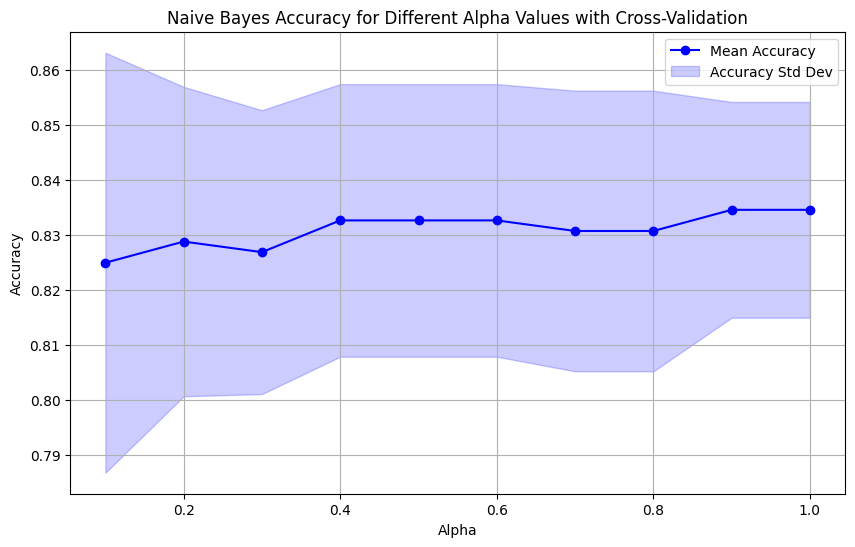

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
import pandas as pd
import matplotlib.pyplot as plt

# Daftar nilai alpha yang ingin diuji
alpha_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

# Menyimpan hasil evaluasi cross-validation dalam list
cv_results = []

# Loop untuk menguji setiap alpha dengan cross-validation
for alpha in alpha_values:
    # Inisialisasi model dengan nilai alpha
    nb = MultinomialNB(alpha=alpha)

    # Cross-validation dengan metrik accuracy
    scores = cross_val_score(
        nb,
        X_train_tfidf,  # Matriks TF-IDF training
        y_train,        # Label training
        cv=5,           # Jumlah fold cross-validation
        scoring='accuracy'  # Metrik evaluasi: accuracy
    )

    # Menyimpan hasil cross-validation untuk tiap alpha
    cv_results.append({
        'alpha': alpha,
        'mean_accuracy': scores.mean(),  # Rata-rata accuracy
        'std_accuracy': scores.std()    # Standar deviasi accuracy
    })

# Mengonversi hasil cross-validation ke DataFrame
cv_results_df = pd.DataFrame(cv_results)

# Menampilkan hasil cross-validation
print("Hasil Cross-Validation (Accuracy):")
print(cv_results_df)

# Menemukan alpha terbaik berdasarkan skor accuracy tertinggi
best_alpha = cv_results_df.loc[cv_results_df['mean_accuracy'].idxmax(), 'alpha']
print(f"Alpha terbaik berdasarkan Cross-Validation (Accuracy): {best_alpha}")

# Menampilkan grafik untuk accuracy berdasarkan alpha values
plt.figure(figsize=(10, 6))
plt.plot(cv_results_df['alpha'], cv_results_df['mean_accuracy'], marker='o', color='b', label='Mean Accuracy')
plt.fill_between(cv_results_df['alpha'],
                 cv_results_df['mean_accuracy'] - cv_results_df['std_accuracy'],
                 cv_results_df['mean_accuracy'] + cv_results_df['std_accuracy'],
                 color='b', alpha=0.2, label='Accuracy Std Dev')
plt.xlabel('Alpha')
plt.ylabel('Accuracy')
plt.title('Naive Bayes Accuracy for Different Alpha Values with Cross-Validation')
plt.legend(loc='best')
plt.grid(True)
plt.show()



Evaluasi pada data testing:
Testing Accuracy: 0.8231
Testing Precision: 0.8241
Testing Recall: 0.8231
Testing F1 Score: 0.8232

Classification Report:
              precision    recall  f1-score   support

    bullying       0.80      0.84      0.82        62
non-bullying       0.85      0.81      0.83        68

    accuracy                           0.82       130
   macro avg       0.82      0.82      0.82       130
weighted avg       0.82      0.82      0.82       130



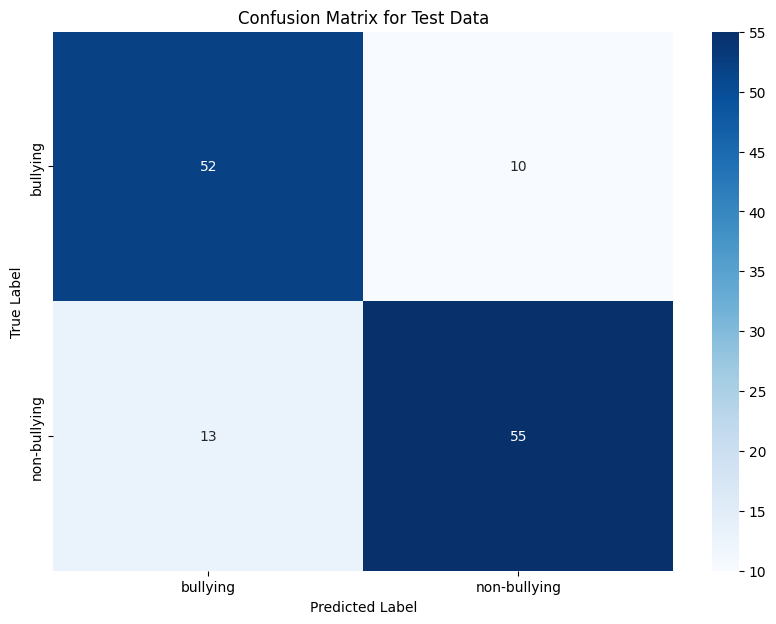

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Inisialisasi model dengan alpha terbaik
best_nb = MultinomialNB(alpha=best_alpha)

# Latih model dengan seluruh data training
best_nb.fit(X_train_tfidf, y_train)

# Evaluasi pada data testing
y_test_pred = best_nb.predict(X_test_tfidf)

# Hitung metrik evaluasi untuk data testing
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='weighted', zero_division=0)
test_recall = recall_score(y_test, y_test_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

# Menampilkan hasil evaluasi testing
print("\nEvaluasi pada data testing:")
print(f"Testing Accuracy: {test_accuracy:.4f}")
print(f"Testing Precision: {test_precision:.4f}")
print(f"Testing Recall: {test_recall:.4f}")
print(f"Testing F1 Score: {test_f1:.4f}")

# Menampilkan classification report
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred, target_names=label_encoder.classes_))

# Menghitung confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Menampilkan confusion matrix dengan seaborn heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Test Data')
plt.show()


# **LEXICON BASED**

Distribusi hasil bullying vs non-bullying (Lexicon-based):
Kategori_Lexicon
non-bullying    601
bullying         49
Name: count, dtype: int64

Confusion Matrix dan Evaluasi:


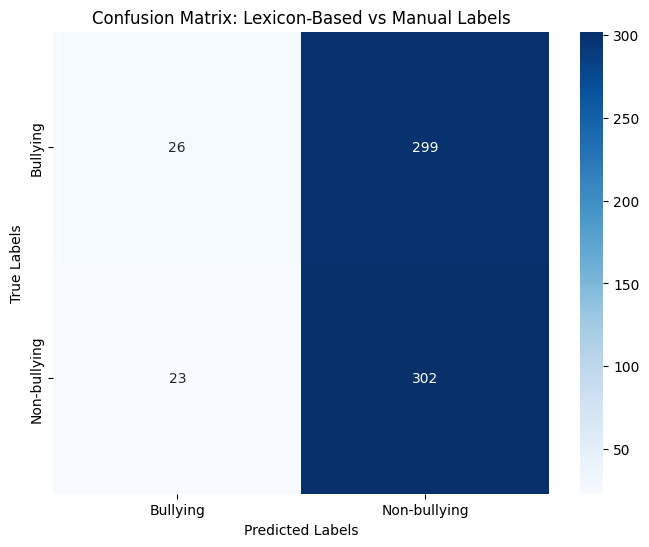


Classification Report:
              precision    recall  f1-score   support

    Bullying       0.53      0.08      0.14       325
Non-bullying       0.50      0.93      0.65       325

    accuracy                           0.50       650
   macro avg       0.52      0.50      0.40       650
weighted avg       0.52      0.50      0.40       650



In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Inisialisasi Sentiment Intensity Analyzer
sia = SentimentIntensityAnalyzer()

# Daftar kata bullying (dapat Anda sesuaikan)
bullying_keywords = ['bodoh', 'jelek', 'tolol', 'goblok', 'hina', 'caci', 'benci']

# Fungsi untuk mendeteksi bullying atau non-bullying
def detect_bullying_vader(text):
    sentiment = sia.polarity_scores(text)
    compound_score = sentiment['compound']

    # Aturan modifikasi untuk bullying:
    # - Jika sentimen negatif kuat (compound <= -0.05), dianggap bullying
    # - Jika sentimen netral (compound > -0.05 dan <= 0.05) dan ada kata bullying, dianggap bullying
    # - Jika sentimen positif (> 0.05), dianggap non-bullying, kecuali ada kata bullying

    if compound_score <= -0.05:
        return 'bullying'
    elif compound_score > 0.05:
        return 'non-bullying'
    elif -0.05 < compound_score <= 0.05:
        # Jika netral dan ada kata bullying
        if any(keyword in text.lower() for keyword in bullying_keywords):
            return 'bullying'
        else:
            return 'non-bullying'
# Terapkan fungsi ke dataset
df_test['Kategori_Lexicon'] = df_test['Komentar_Bersih'].apply(detect_bullying_vader)

# Pastikan label sudah sesuai dan tidak ada NaN
df_test = df_test.dropna(subset=['Kategori', 'Kategori_Lexicon'])

# Melihat distribusi hasil
print("Distribusi hasil bullying vs non-bullying (Lexicon-based):")
print(df_test['Kategori_Lexicon'].value_counts())

# Confusion Matrix dan evaluasi
print("\nConfusion Matrix dan Evaluasi:")

# Samakan format penulisan
df_test['Kategori'] = df_test['Kategori'].str.lower()
df_test['Kategori_Lexicon'] = df_test['Kategori_Lexicon'].str.lower()

# Confusion matrix
cm = confusion_matrix(df_test['Kategori'], df_test['Kategori_Lexicon'], labels=['bullying', 'non-bullying'])

# Tampilkan confusion matrix menggunakan seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Bullying', 'Non-bullying'], yticklabels=['Bullying', 'Non-bullying'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix: Lexicon-Based vs Manual Labels')
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(df_test['Kategori'], df_test['Kategori_Lexicon'], target_names=['Bullying', 'Non-bullying']))


In [ ]:
!pip install deep-translator

Distribusi hasil bullying vs non-bullying (Lexicon-based):
Kategori_Lexicon
non-bullying    456
bullying        194
Name: count, dtype: int64

Confusion Matrix dan Evaluasi:


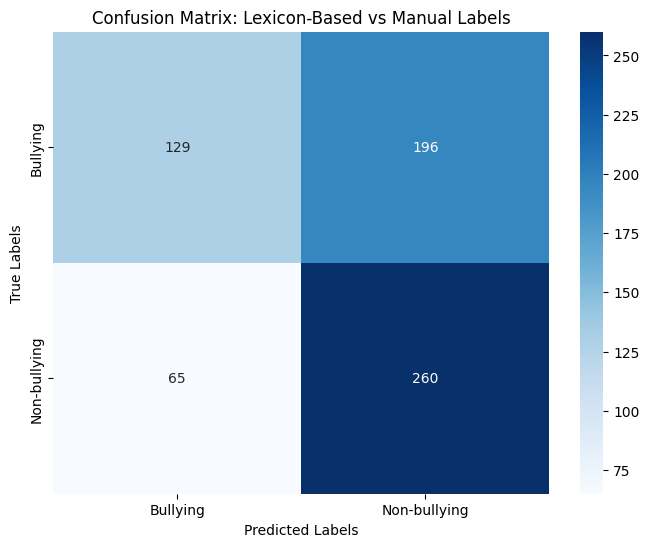


Classification Report:
              precision    recall  f1-score   support

    Bullying       0.66      0.40      0.50       325
Non-bullying       0.57      0.80      0.67       325

    accuracy                           0.60       650
   macro avg       0.62      0.60      0.58       650
weighted avg       0.62      0.60      0.58       650



In [ ]:
from deep_translator import GoogleTranslator
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Inisialisasi Translator dan Sentiment Intensity Analyzer
translator = Translator()
sia = SentimentIntensityAnalyzer()

# Daftar kata bullying (dapat Anda sesuaikan)
bullying_keywords = ['stupid', 'ugly', 'dumb', 'idiot', 'insult', 'mock', 'hate']

# Fungsi untuk mendeteksi bullying atau non-bullying
def detect_bullying_vader(text):
    # Terjemahkan teks ke dalam bahasa Inggris
    translator = GoogleTranslator(source='auto', target='en')
    translated_text = translator.translate(text)

    # Analisis sentimen dengan VADER
    sentiment = sia.polarity_scores(translated_text)
    compound_score = sentiment['compound']

    # Aturan modifikasi untuk bullying:
    # - Jika sentimen negatif kuat (compound <= -0.05), dianggap bullying
    # - Jika sentimen netral (compound > -0.05 dan <= 0.05) dan ada kata bullying, dianggap bullying
    # - Jika sentimen positif (> 0.05), dianggap non-bullying, kecuali ada kata bullying

    if compound_score <= -0.05:
        return 'bullying'
    elif compound_score > 0.05:
        return 'non-bullying'
    elif -0.05 < compound_score <= 0.05:
        # Jika netral dan ada kata bullying
        if any(keyword in text.lower() for keyword in bullying_keywords):
            return 'bullying'
        else:
            return 'non-bullying'

# Terapkan fungsi ke dataset
df_test['Kategori_Lexicon'] = df_test['Komentar_Bersih'].apply(detect_bullying_vader)

# Pastikan label sudah sesuai dan tidak ada NaN
df_test = df_test.dropna(subset=['Kategori', 'Kategori_Lexicon'])

# Melihat distribusi hasil
print("Distribusi hasil bullying vs non-bullying (Lexicon-based):")
print(df_test['Kategori_Lexicon'].value_counts())

# Confusion Matrix dan evaluasi
print("\nConfusion Matrix dan Evaluasi:")

# Samakan format penulisan
df_test['Kategori'] = df_test['Kategori'].str.lower()
df_test['Kategori_Lexicon'] = df_test['Kategori_Lexicon'].str.lower()

# Confusion matrix
cm = confusion_matrix(df_test['Kategori'], df_test['Kategori_Lexicon'], labels=['bullying', 'non-bullying'])

# Tampilkan confusion matrix menggunakan seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Bullying', 'Non-bullying'], yticklabels=['Bullying', 'Non-bullying'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix: Lexicon-Based vs Manual Labels')
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(df_test['Kategori'], df_test['Kategori_Lexicon'], target_names=['Bullying', 'Non-bullying']))


lexicon itu sistem e kek kamu ngliat daftar dari buku bukan machine learning, nah lexicon itu lebih ke positif neutral negatif, bukan ke bulllying si , ini juga apgred nya ku usahain translate dari indo ke ingg soal e lexiconn e itu isa ne inggris

In [ ]:
df_test

,Komentar,Kategori,Komentar_Bersih,Kategori_Lexicon
0,"""Kaka tidur yaa, udah pagi, gaboleh capek2""",non-bullying,kaka tidur yaa udah pagi gaboleh capek2,non-bullying
1,"""makan nasi padang aja begini badannya""",non-bullying,makan nasi padang aja badan,non-bullying
2,"""yang aku suka dari dia adalah selalu cukur je...",bullying,suka cukur jembut manggung,non-bullying
3,"""Hai kak Isyana aku ngefans banget sama kak Is...",non-bullying,hai kak isyana ngefans banget kak isyana aku ...,non-bullying
4,"""Manusia apa bidadari sih herann deh cantik te...",non-bullying,manusia bidadari sih herann deh cantik reliev...,non-bullying
...,...,...,...,...
645,"""aku memutuskan untuk menjadi fans isyana. gil...",non-bullying,putus fans isyana gila keren banget ya otak...,non-bullying
646,"""AMZING ISYANAA!! Jujur aku amazed banget deng...",non-bullying,amzing isyanaa jujur amazed banget skill mi...,non-bullying
647,"""paling ngiri liat orang keren maen alat musik...",non-bullying,ngiri liat orang keren maen alat musik dalem ...,non-bullying
648,"""Sampe ga bisa berkata2 lagi buat isyana, sang...",non-bullying,sampe ga berkata2 isyana sangat2 sempurna org,non-bullying
